<a href="https://colab.research.google.com/github/souradipta93/Predictive_Analytics/blob/main/nm_cluster_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Cluster Analysis-  K-Means  clustering
#Example Problem Adopted from Marketing Ressearch 
#Naresh Malhotra

In [ ]:
#Import Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Read Data File
mydata=pd.read_csv("nm-cluster.csv")
mydata   

,caseno,Fun,BadforBudget,EatingOut,BestBuys,DonotCare,ComparePrices
0,1,6,4,7,3,2,3
1,2,2,3,1,4,5,4
2,3,7,2,6,4,1,3
3,4,4,6,4,5,3,6
4,5,1,3,2,2,6,4
5,6,6,4,6,3,3,4
6,7,5,3,6,3,3,4
7,8,7,3,7,4,1,4
8,9,2,4,3,3,6,3
9,10,3,5,3,6,4,6


In [ ]:
#Standardizing Variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=mydata.iloc[:,1:7]
scaled_mydata=scaler.fit_transform(X)


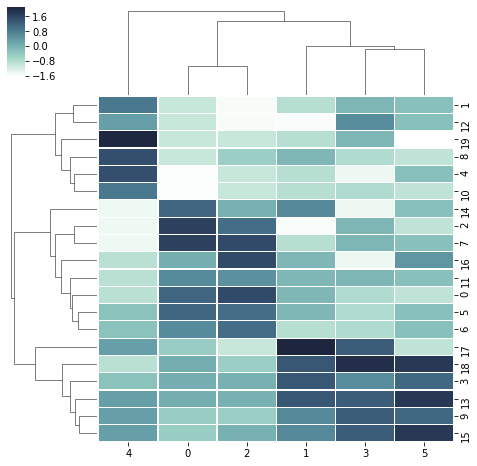

In [ ]:
#Dendrogram(Tree Diagram)
cmap=sns.cubehelix_palette(as_cmap=True,rot=-.3,light=1)
sns.clustermap(scaled_mydata,cmap=cmap,linewidths=.2,
              figsize=(8,8));

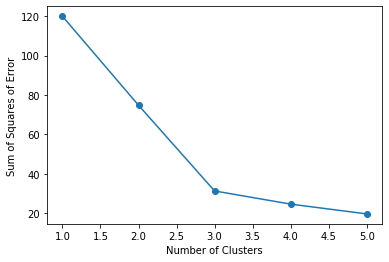

In [ ]:
#Optimum Cluster
from sklearn.cluster import KMeans
cluster_range=range(1,6)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(scaled_mydata)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))        
plt.ylabel("Sum of Squares of Error")
plt.xlabel("Number of Clusters")
plt.plot(cluster_range,cluster_errors,marker="o");
    

In [ ]:
#Building the KMeans Cluster
k=3
clusters=KMeans(k,random_state=42)
clusters.fit(scaled_mydata)
mydata["clusterid"]=clusters.labels_
mydata
 

,caseno,Fun,BadforBudget,EatingOut,BestBuys,DonotCare,ComparePrices,clusterid
0,1,6,4,7,3,2,3,0
1,2,2,3,1,4,5,4,1
2,3,7,2,6,4,1,3,0
3,4,4,6,4,5,3,6,2
4,5,1,3,2,2,6,4,1
5,6,6,4,6,3,3,4,0
6,7,5,3,6,3,3,4,0
7,8,7,3,7,4,1,4,0
8,9,2,4,3,3,6,3,1
9,10,3,5,3,6,4,6,2


In [ ]:
mydata[mydata.clusterid==0]

,caseno,Fun,BadforBudget,EatingOut,BestBuys,DonotCare,ComparePrices,clusterid
0,1,6,4,7,3,2,3,0
2,3,7,2,6,4,1,3,0
5,6,6,4,6,3,3,4,0
6,7,5,3,6,3,3,4,0
7,8,7,3,7,4,1,4,0
11,12,5,4,5,4,2,4,0
14,15,6,5,4,2,1,4,0
16,17,4,4,7,2,2,5,0


In [ ]:
mydata[mydata.clusterid==1]

,caseno,Fun,BadforBudget,EatingOut,BestBuys,DonotCare,ComparePrices,clusterid
1,2,2,3,1,4,5,4,1
4,5,1,3,2,2,6,4,1
8,9,2,4,3,3,6,3,1
10,11,1,3,2,3,5,3,1
12,13,2,2,1,5,4,4,1
19,20,2,3,2,4,7,2,1


In [ ]:
mydata[mydata.clusterid==2]

,caseno,Fun,BadforBudget,EatingOut,BestBuys,DonotCare,ComparePrices,clusterid
3,4,4,6,4,5,3,6,2
9,10,3,5,3,6,4,6,2
13,14,4,6,4,6,4,7,2
15,16,3,5,4,6,4,7,2
17,18,3,7,2,6,4,3,2
18,19,4,6,3,7,2,7,2


In [ ]:
#Profiling the Clusters
pd.pivot_table(mydata,values=["Fun","BadforBudget","EatingOut","BestBuys","DonotCare","ComparePrices"],index=["clusterid"])

,BadforBudget,BestBuys,ComparePrices,DonotCare,EatingOut,Fun
clusterid,,,,,,
0,3.625000,3.125,3.875000,1.875,6.000000,5.750000
1,3.000000,3.500,3.333333,5.500,1.833333,1.666667
2,5.833333,6.000,6.000000,3.500,3.333333,3.500000


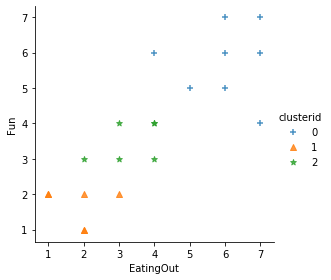

In [ ]:
markers=["+","^","*"]
sns.lmplot("EatingOut","Fun",
          data=mydata,hue="clusterid",
          fit_reg=False,
          markers=markers,
          size=4);

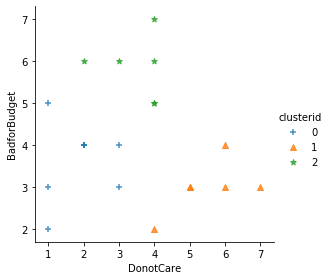

In [ ]:
markers=["+","^","*"]
sns.lmplot("DonotCare","BadforBudget",
          data=mydata,hue="clusterid",
          fit_reg=False,
          markers=markers,
          size=4);

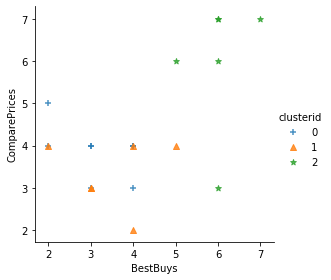

In [ ]:
markers=["+","^","*"]
sns.lmplot("BestBuys","ComparePrices",
          data=mydata,hue="clusterid",
          fit_reg=False,
          markers=markers,
          size=4);